In [1]:
import numpy as np
import pandas as pd
import math
#import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time
import sys
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 50 #None
plt.rcParams["figure.figsize"] = (10,10) #Resize image size

In [2]:
sys.path.insert(0, 'Data/')
sys.path.insert(0, 'Src/')

In [3]:
# Import Functions and Data
from Plot1 import *


### if some plot looks ugly, please rerun it again and it should adjust better

Read data...
Clean data...
Finish Cleaning


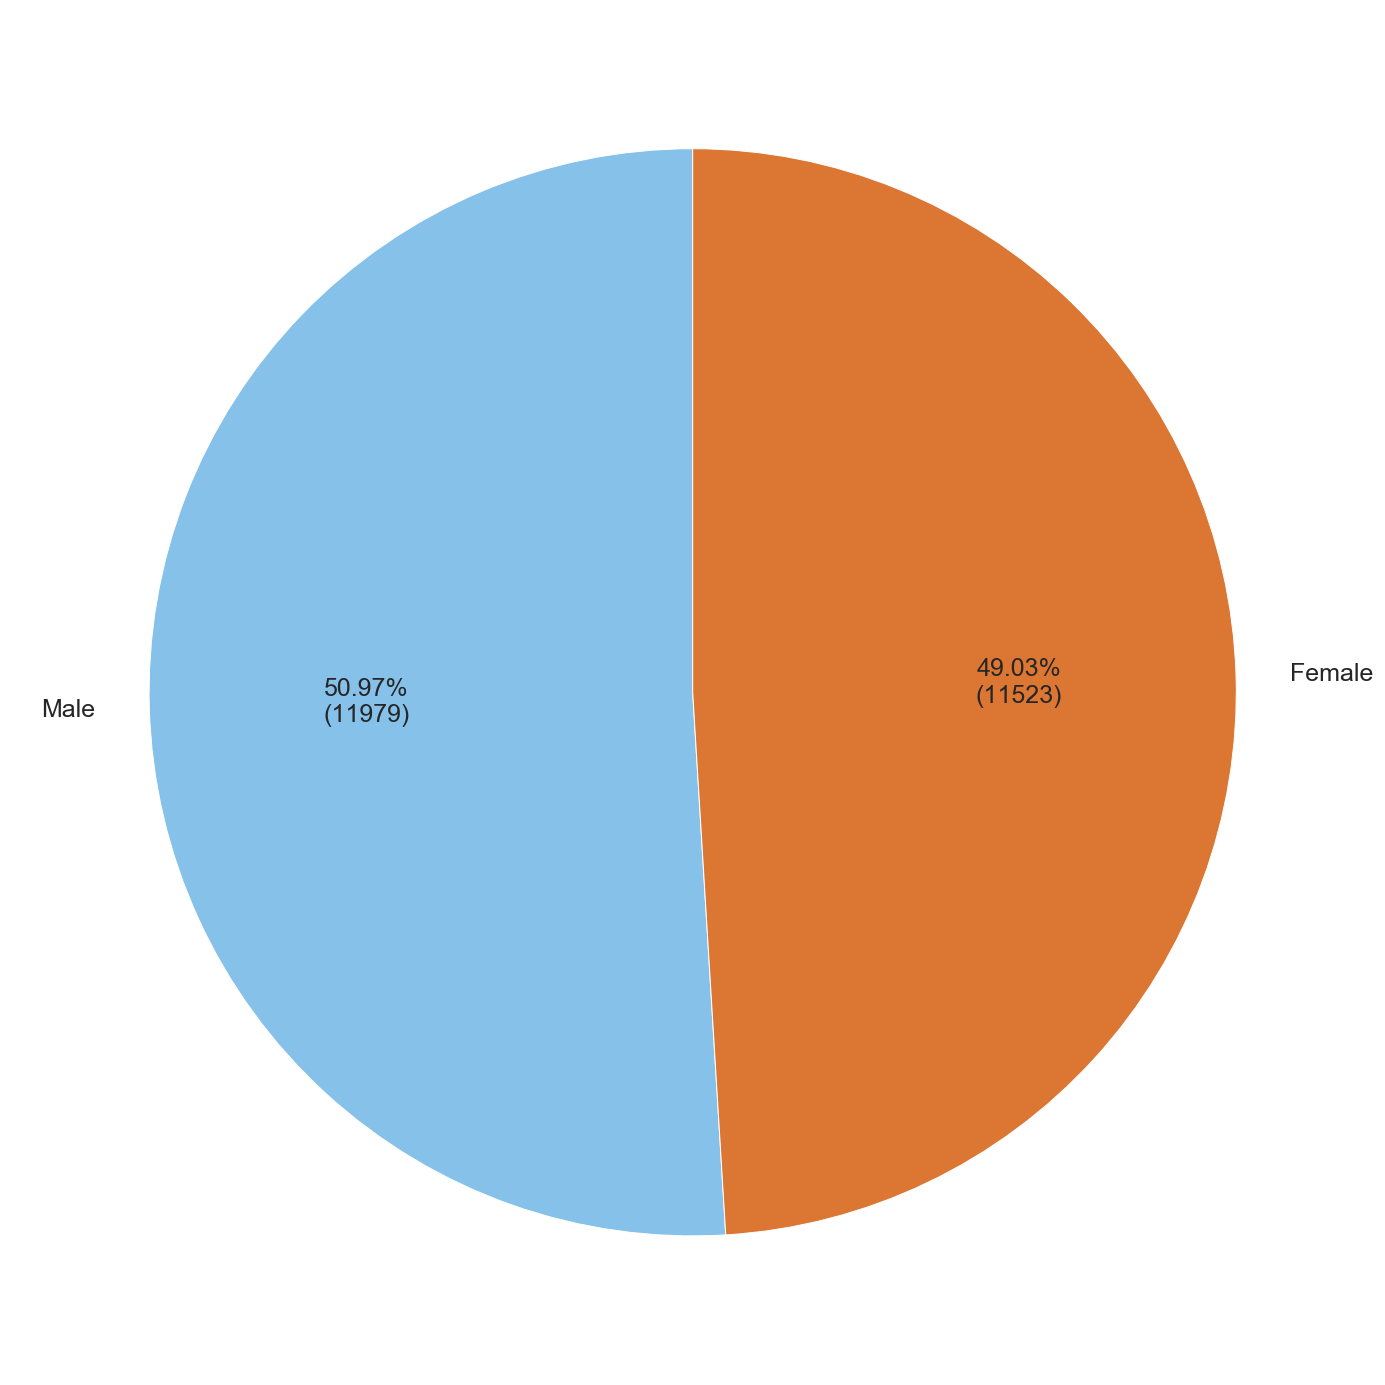

In [16]:
GenderPlot(st)

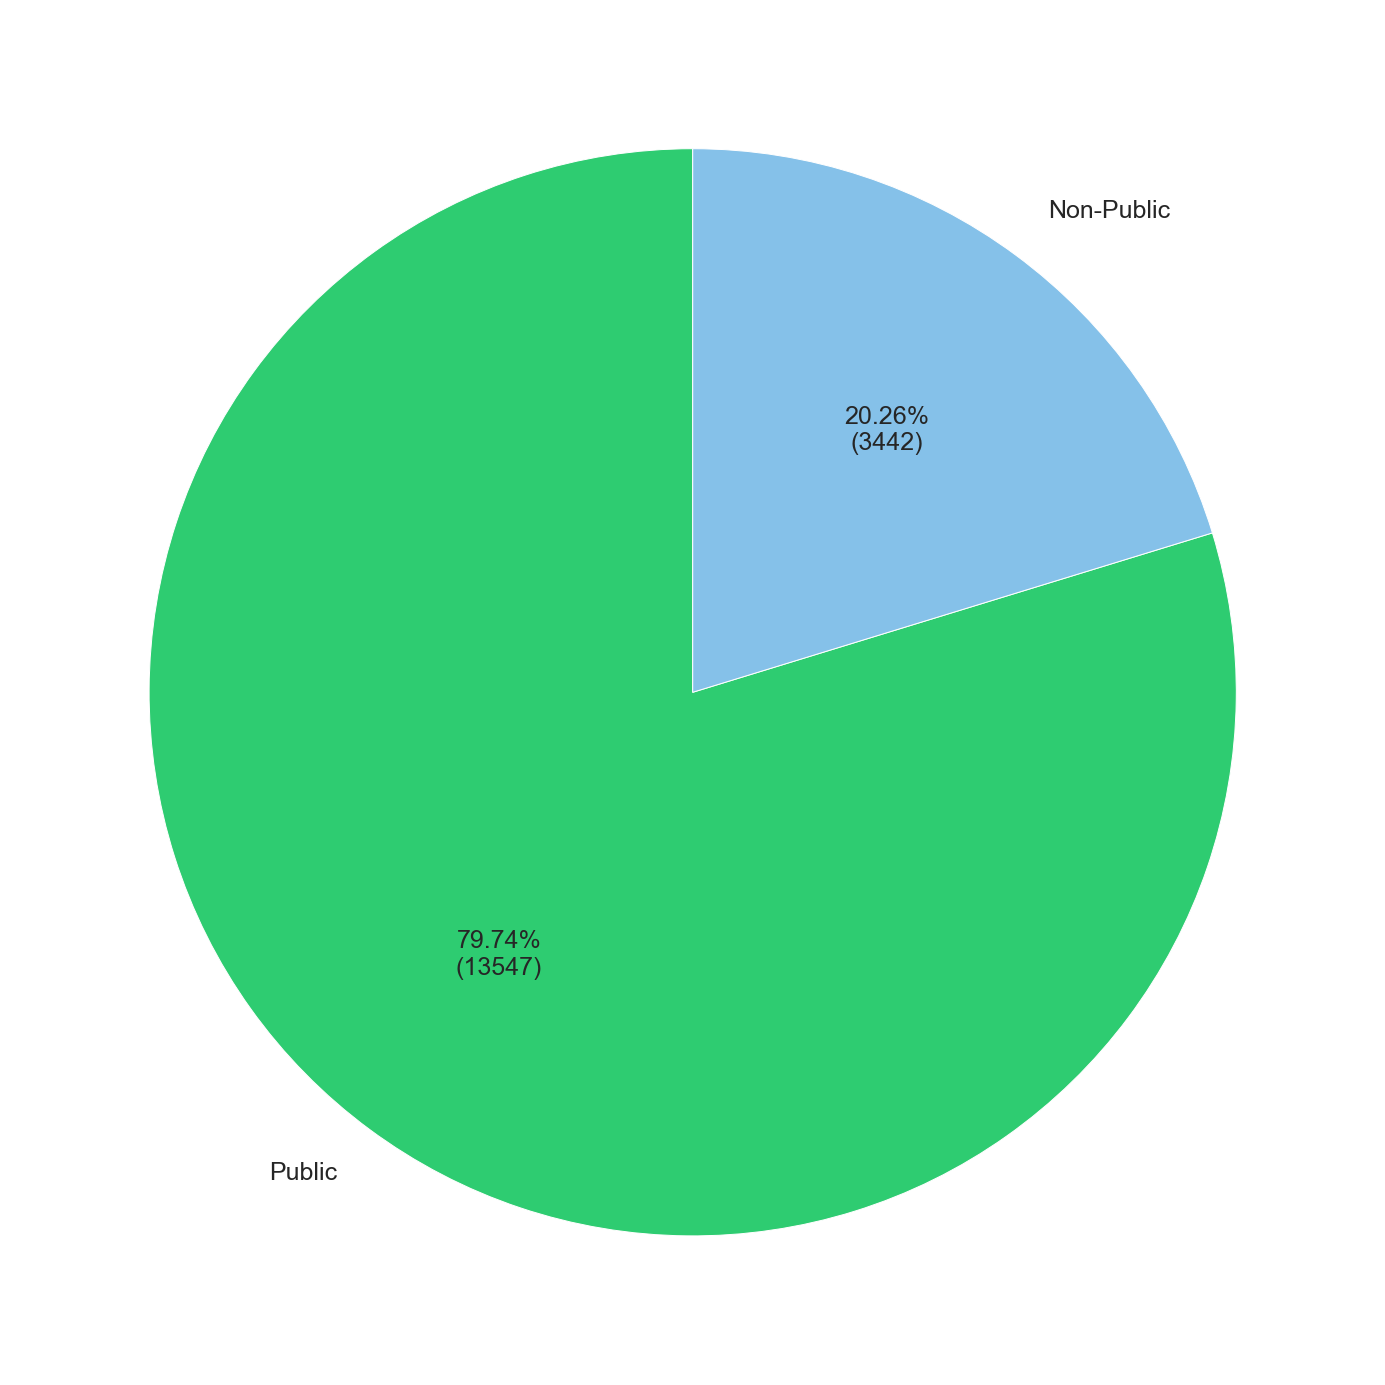

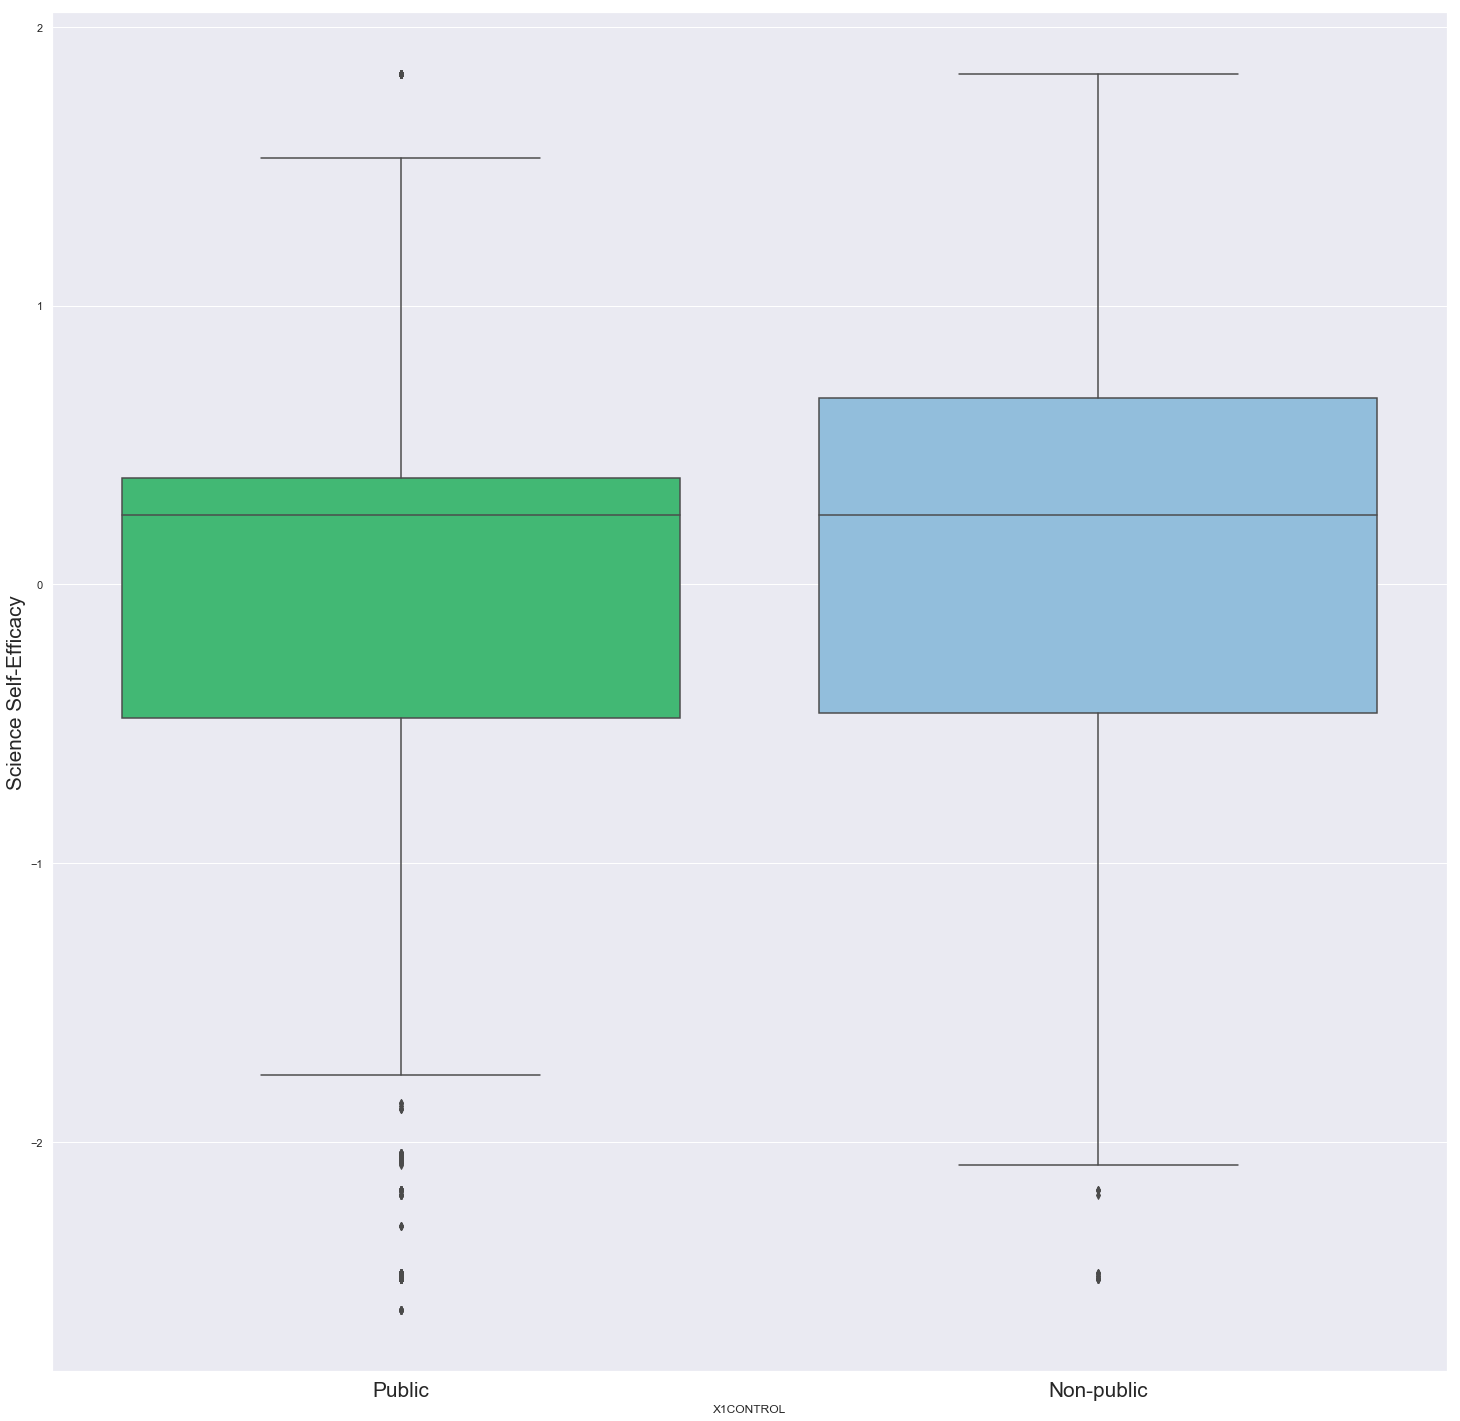

In [17]:
IfPublic(st)

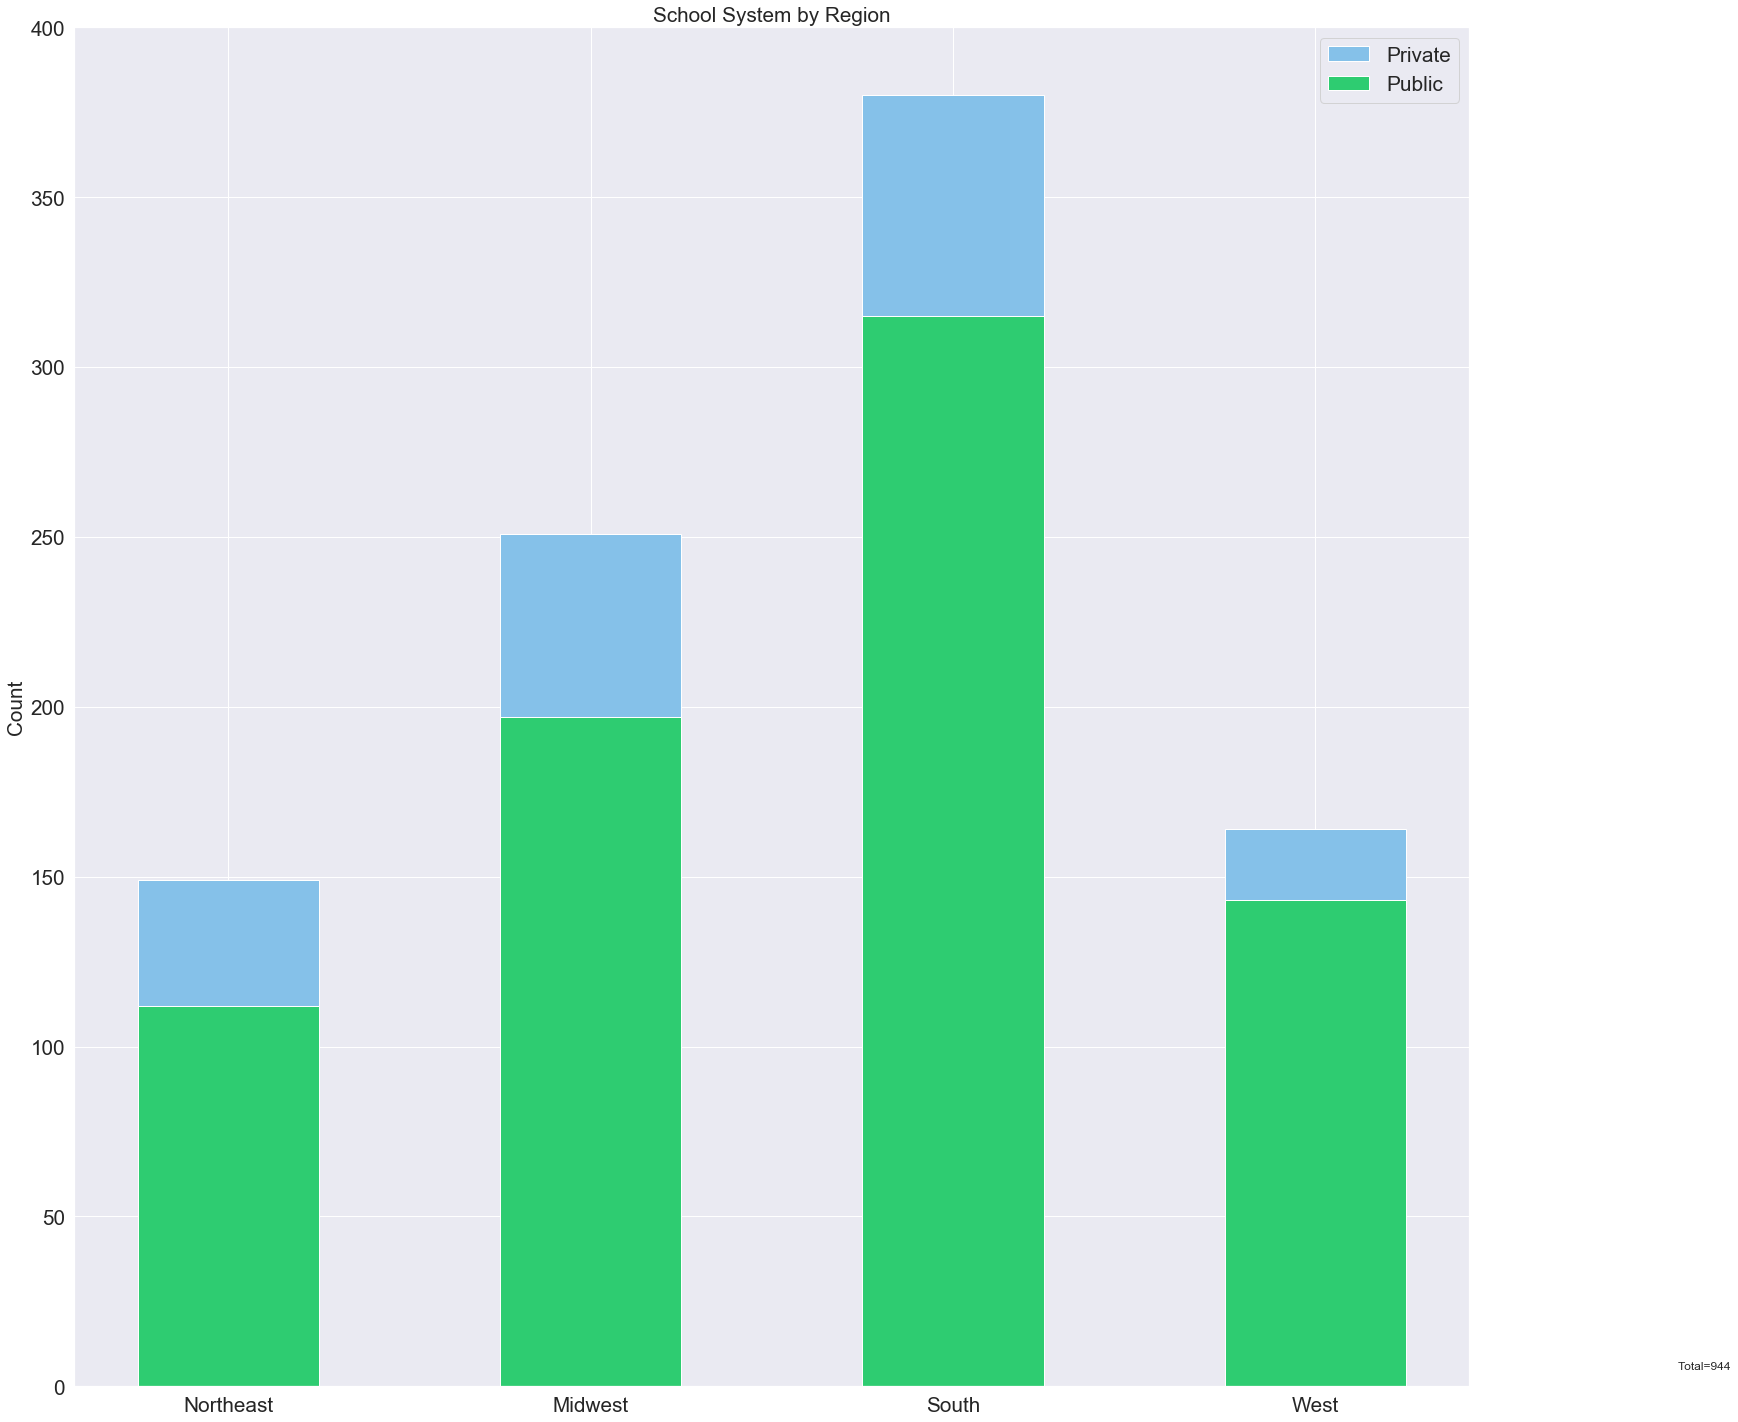

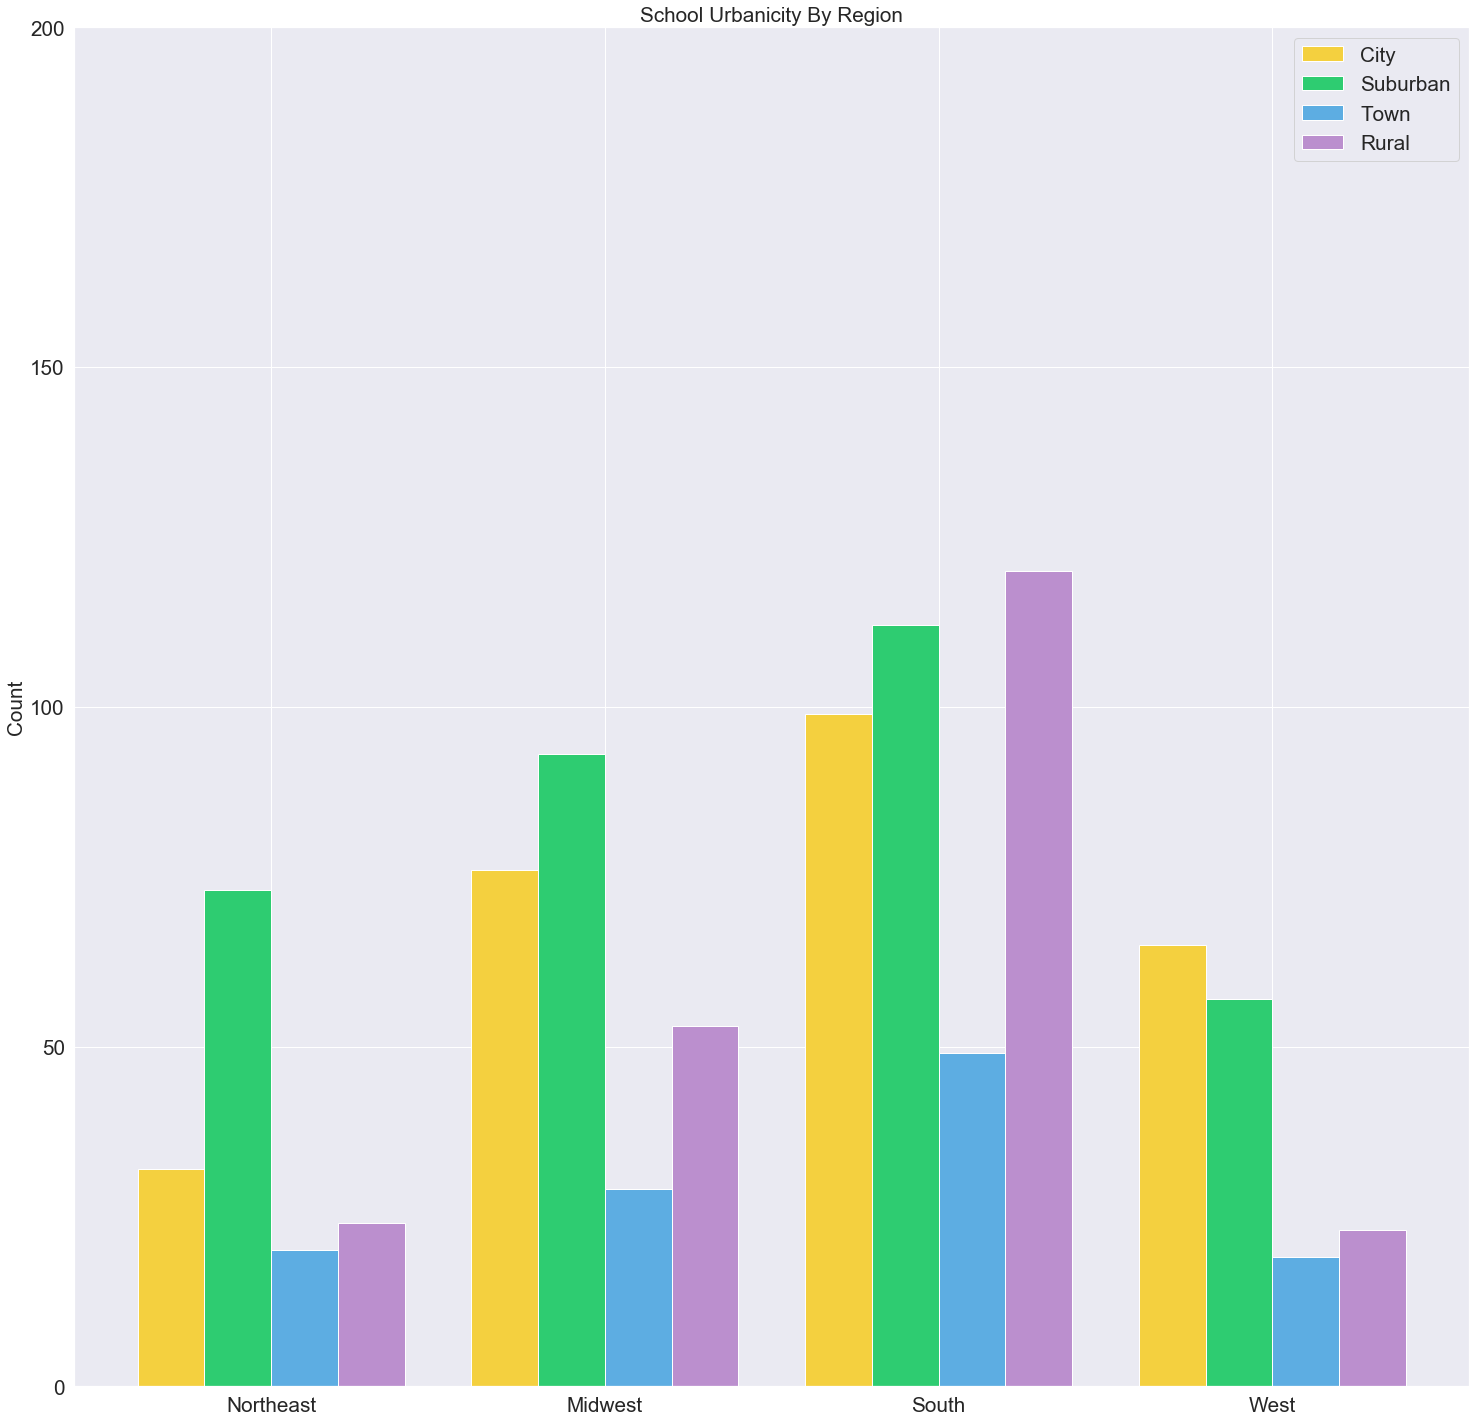

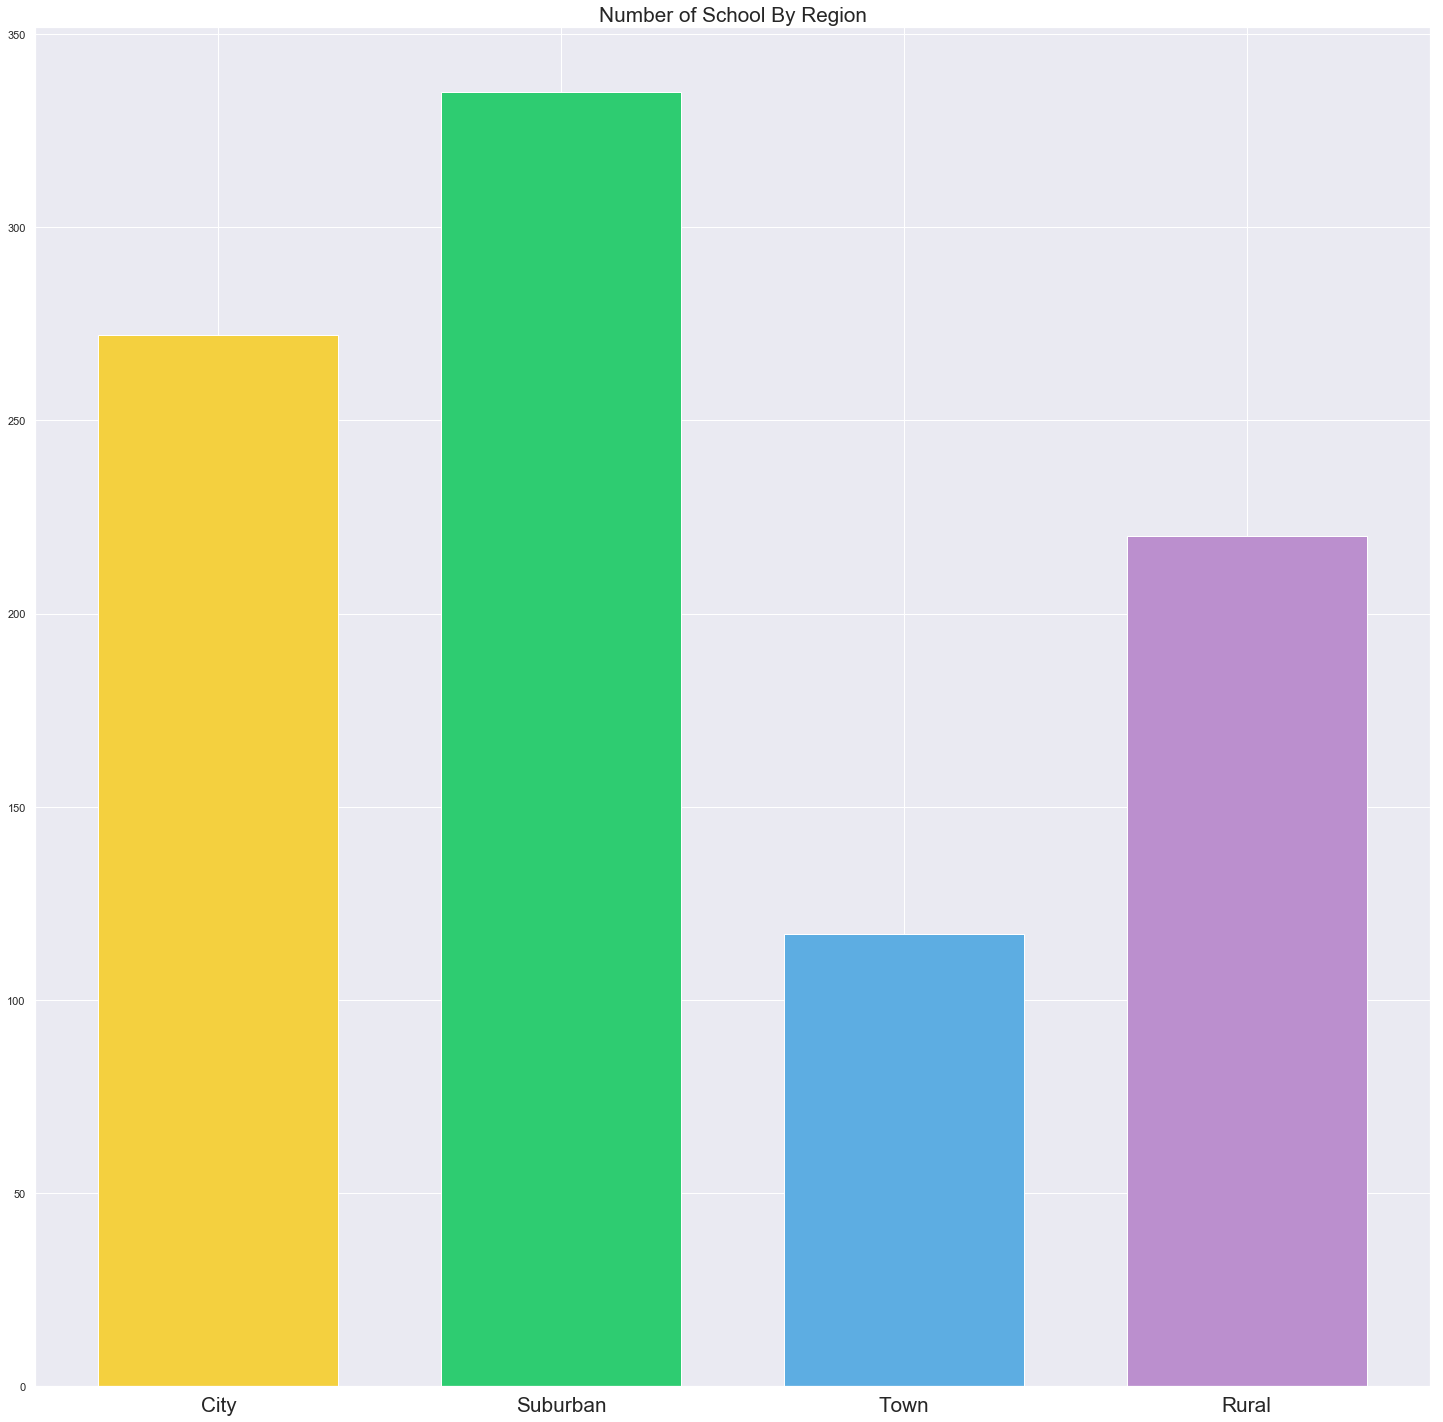

In [18]:
SchoolRegion(sc)

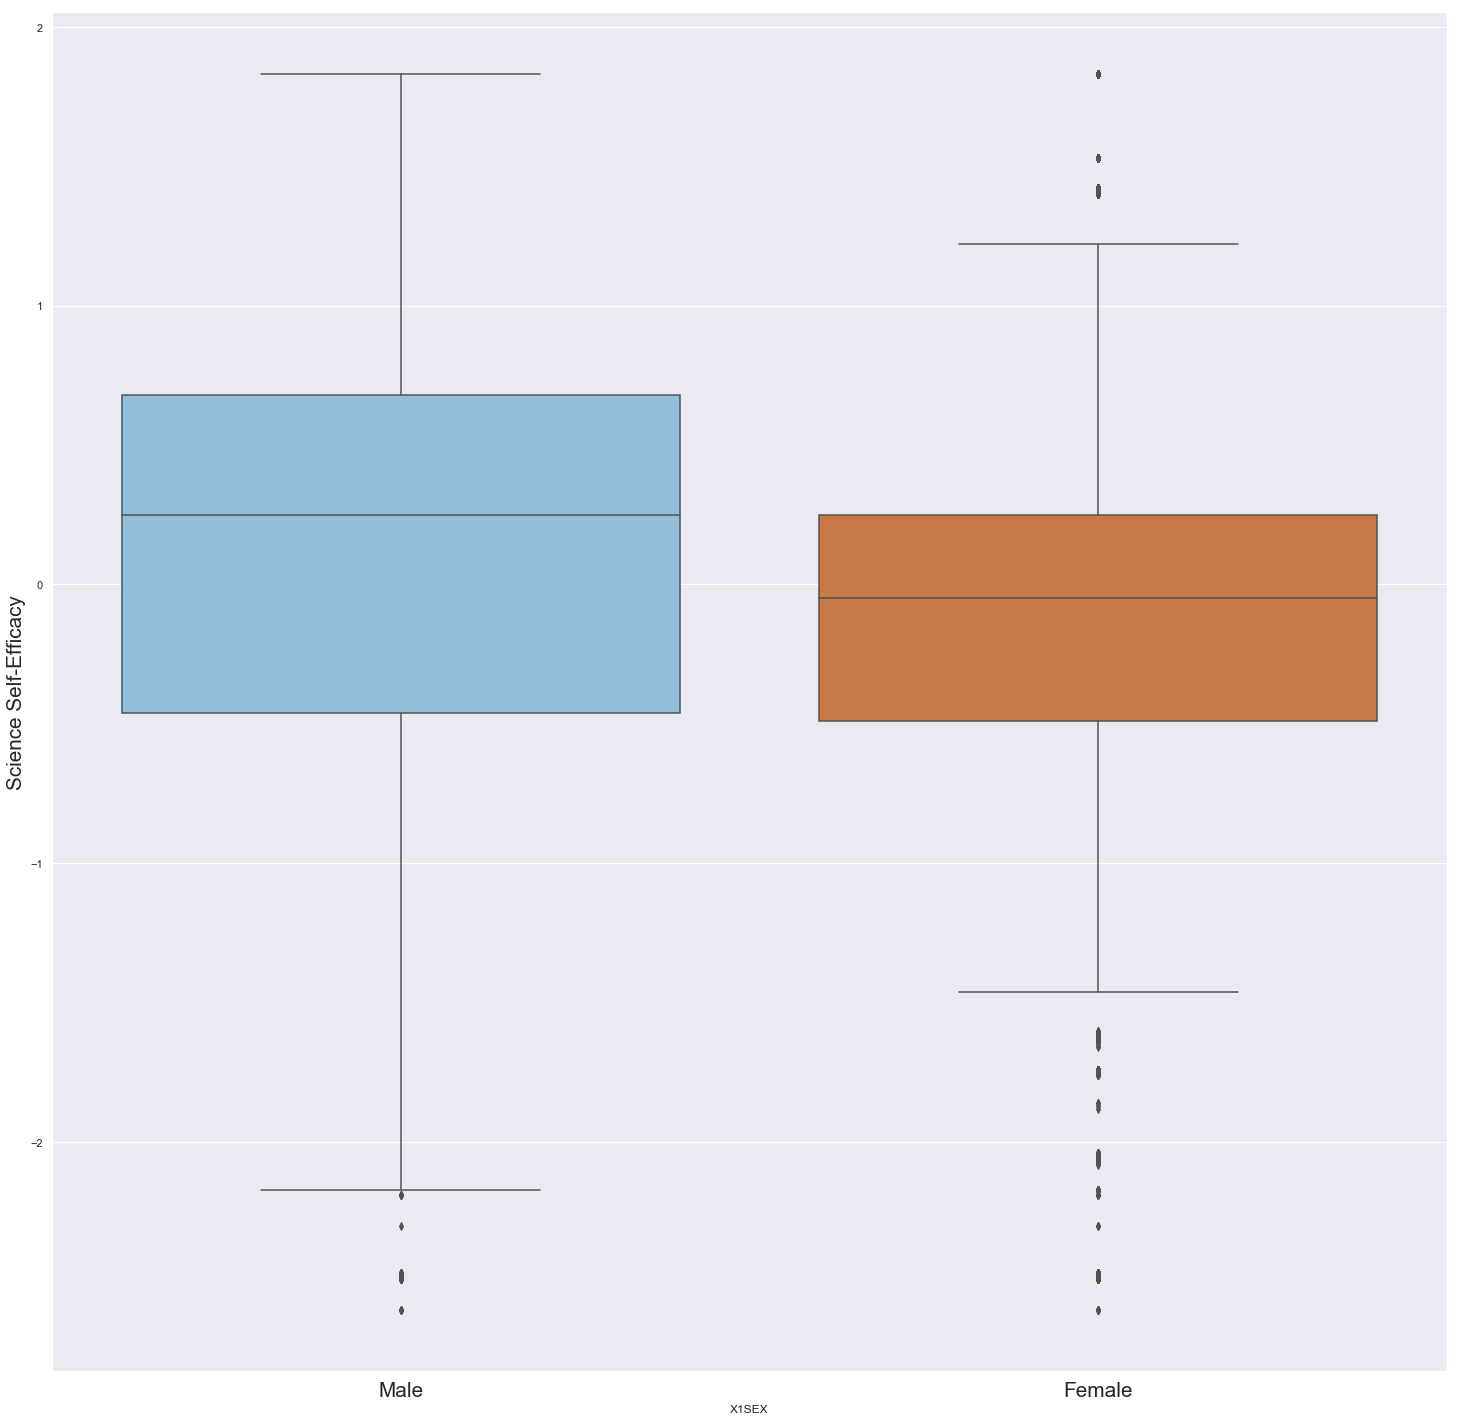

In [19]:
GenderEfficacyImpact(st)

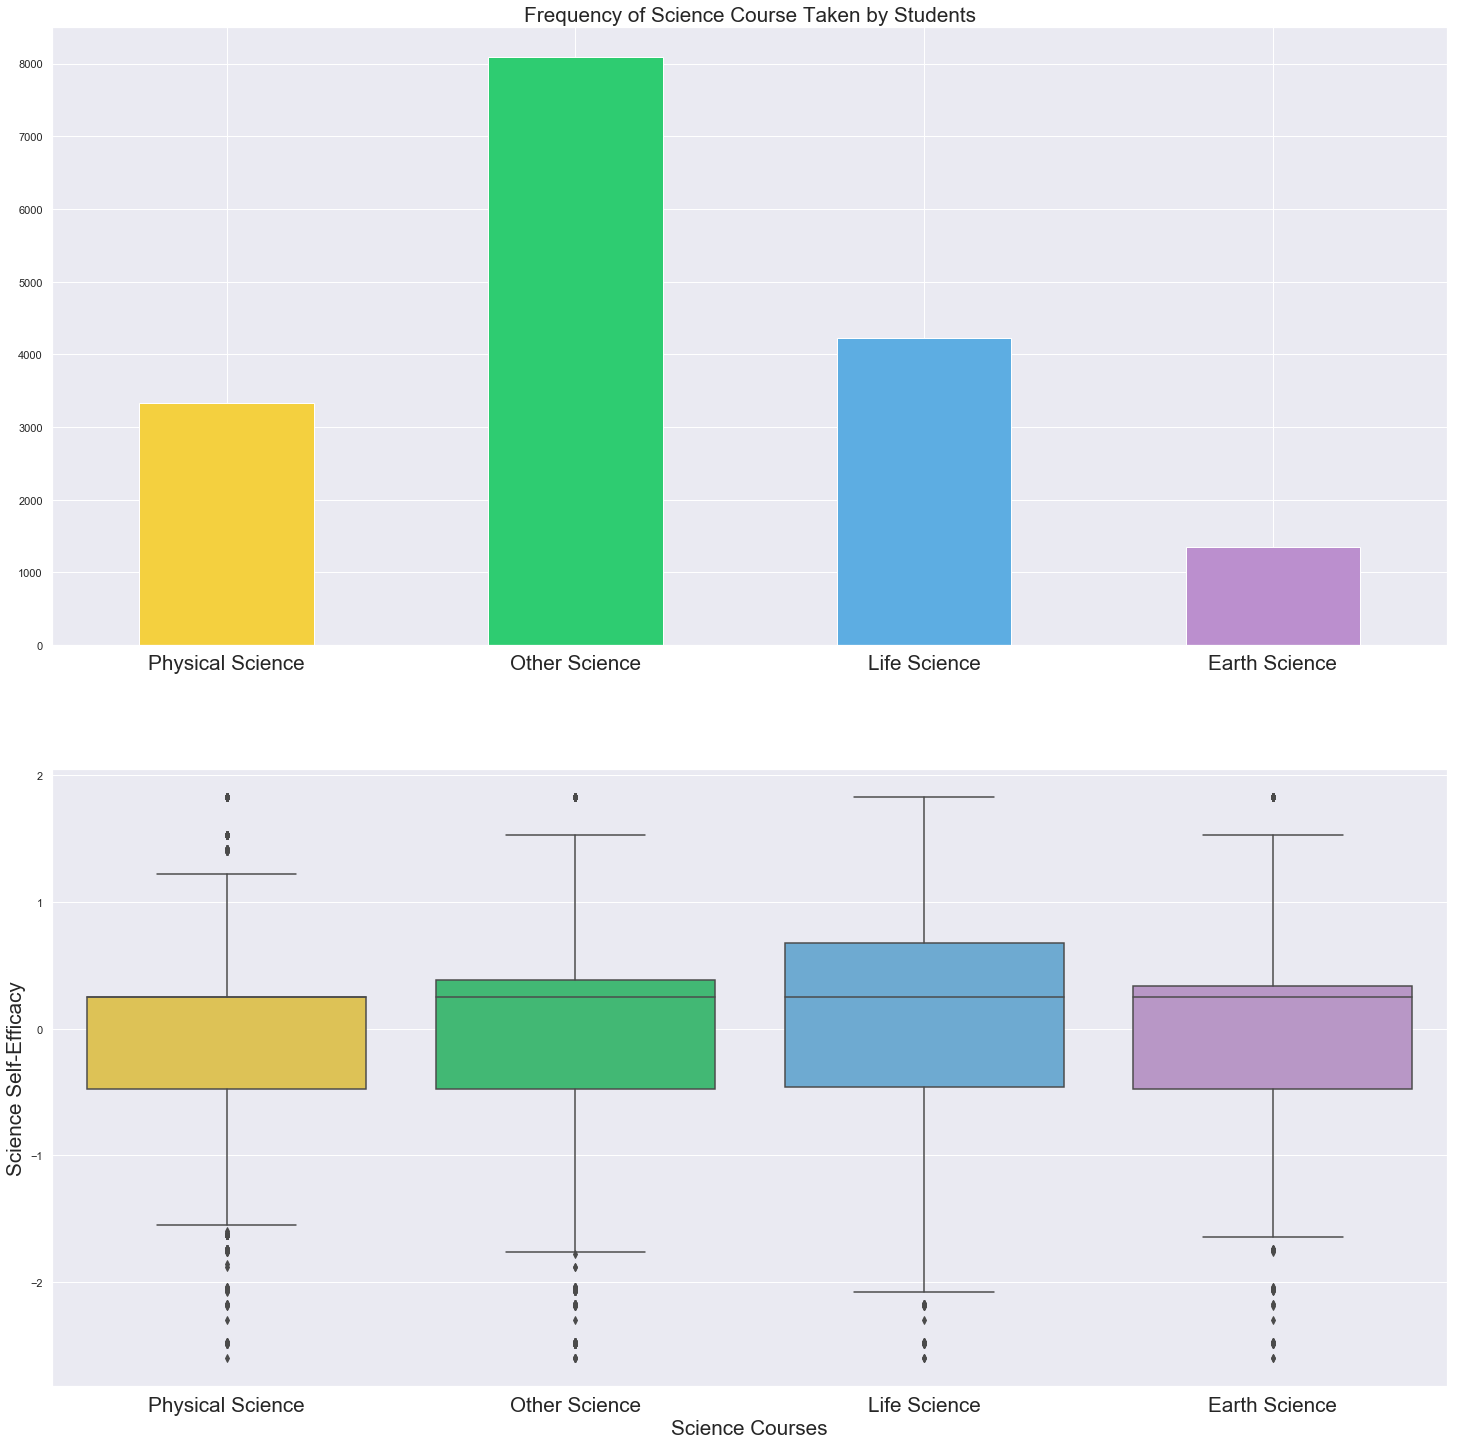

In [20]:
SciCourseImpact(st)


Column name:  X1SES
Column name:  X1SCIINT
Column name:  X1SCIID
Column name:  X1SCIUTI
Column name:  S1TEFRNDS
Column name:  S1TEACTIV
Column name:  S1TEPOPULAR
Column name:  S1TEMAKEFUN
[0.4073694318254276, 0.7791796669335262, 0.4653756339726911, 0.7842397619015831, -0.3271498049282562, -0.3425726735677872, -0.34960723170668173, -0.3428532861000424]


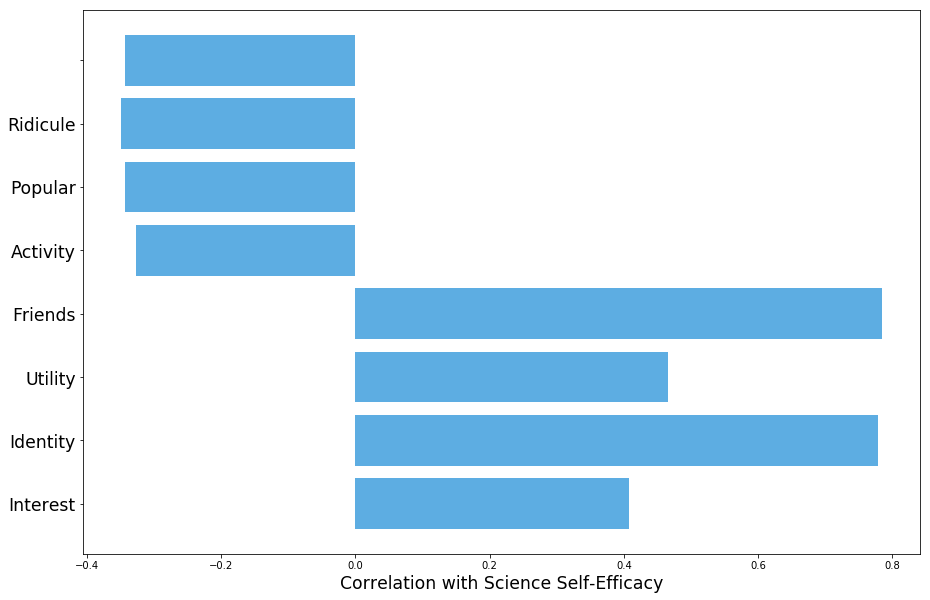

In [10]:
EfficacyCorrelation(st)

   X1SEX  N1SEX  X1TSCERT  X1SCIEFF  N1GROUP  S1STCHVALUES  S1STCHRESPCT  \
0    1.0    2.0       1.0      1.10      1.0           1.0           1.0   
1    2.0    1.0       1.0      0.69      1.0           1.0           1.0   
2    2.0    1.0       0.0     -0.05      0.0           1.0           1.0   
3    2.0    2.0       1.0      0.25      0.0           2.0           2.0   
4    1.0    2.0       1.0      0.25      1.0           4.0           2.0   

   S1STCHFAIR  S1STCHCONF  S1STCHMISTKE  S1STCHTREAT  S1STCHMFDIFF    AFFATT  
0         1.0         1.0           1.0          2.0           2.0  3.714286  
1         1.0         1.0           1.0          1.0           1.0  4.000000  
2         1.0         1.0           1.0          1.0           1.0  4.000000  
3         2.0         2.0           2.0          2.0           2.0  3.000000  
4         3.0         2.0           4.0          4.0           3.0  1.857143  


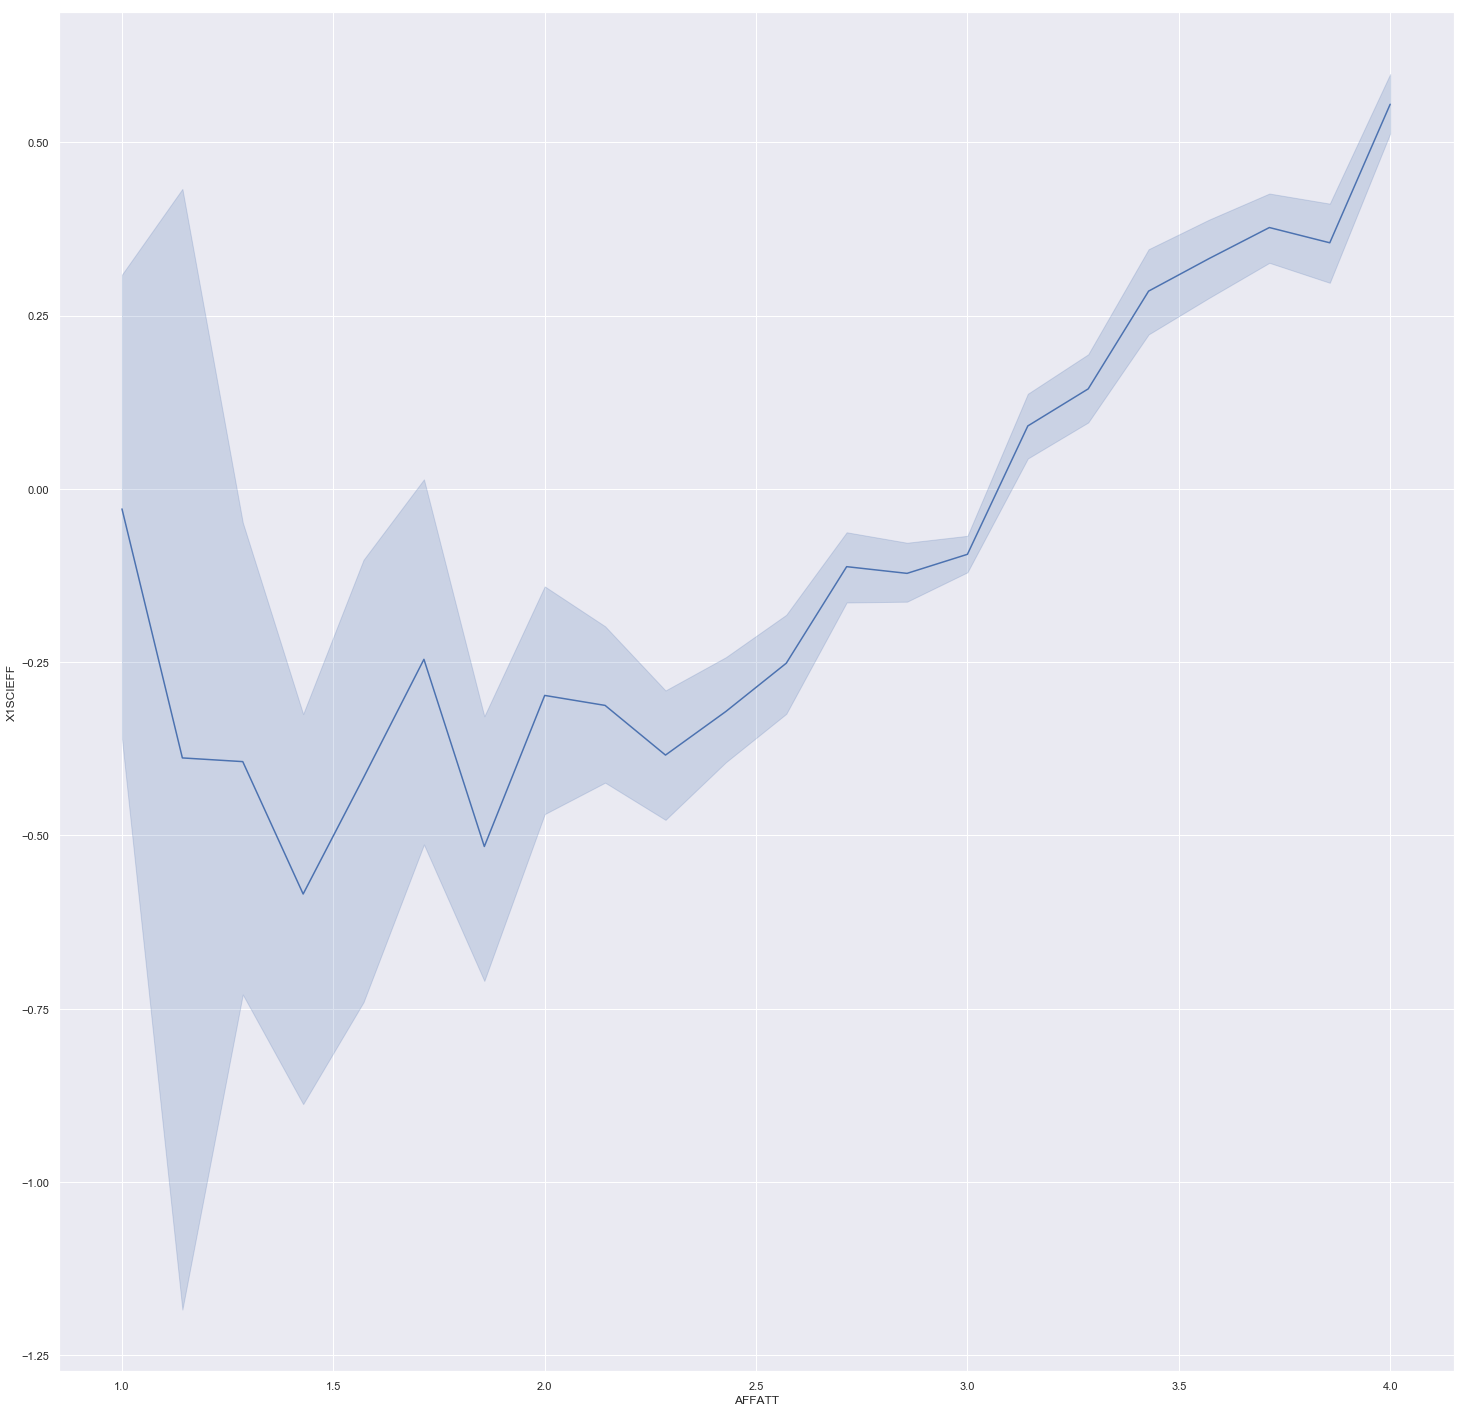

In [11]:
AFFATT(st)

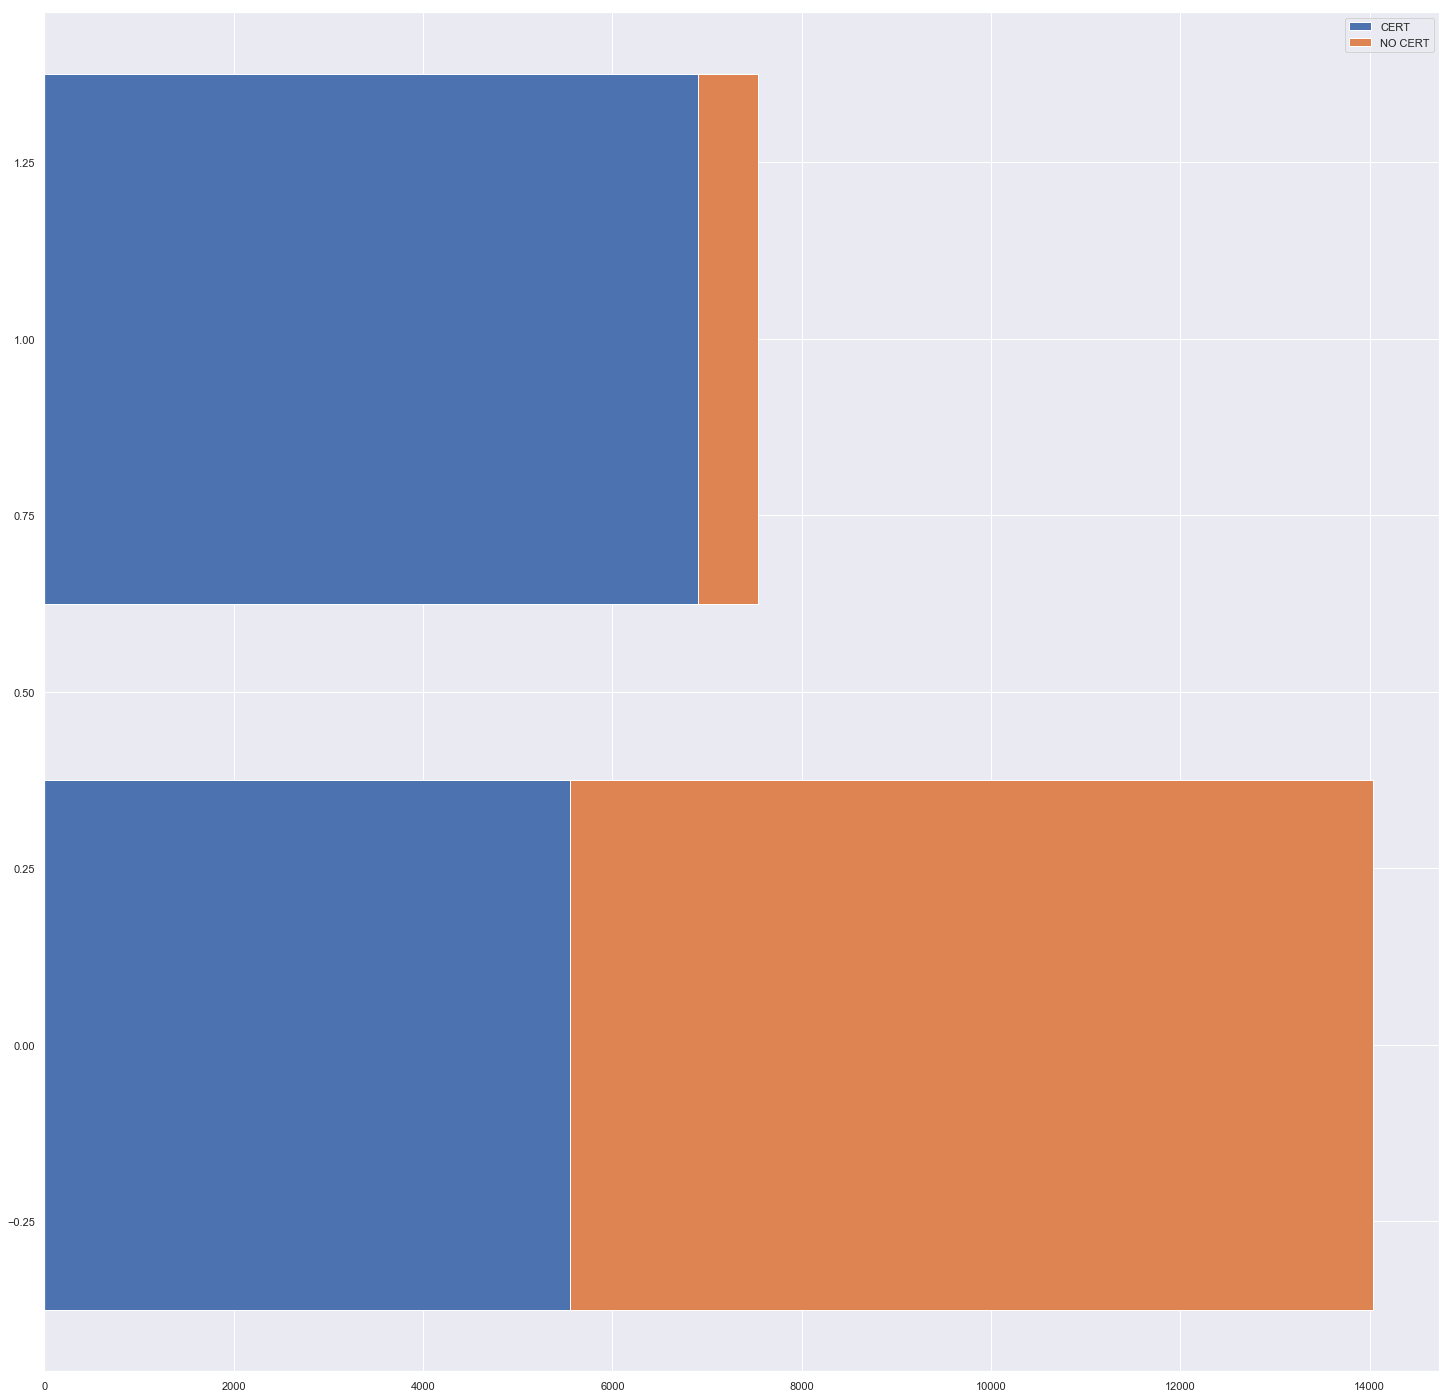

In [12]:
GenderAndCertif(st)

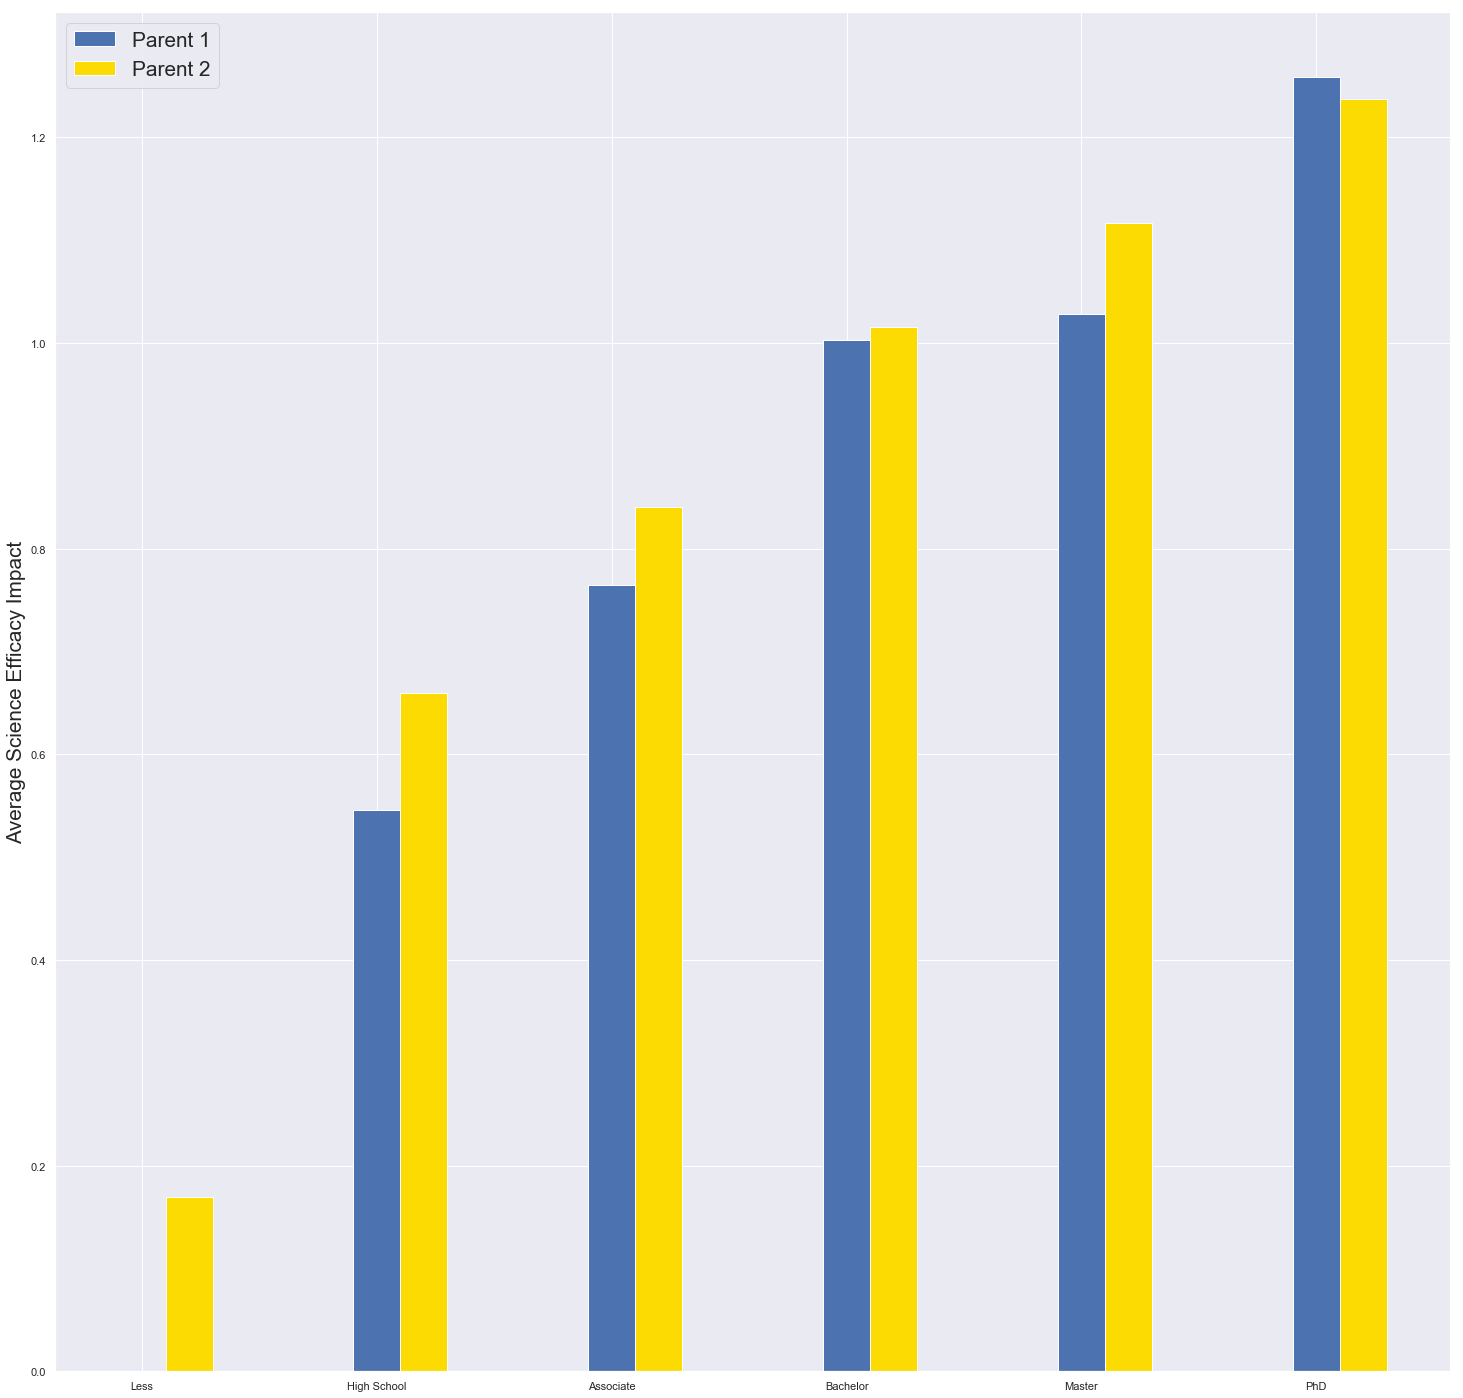

In [13]:
ParentDeg(st)

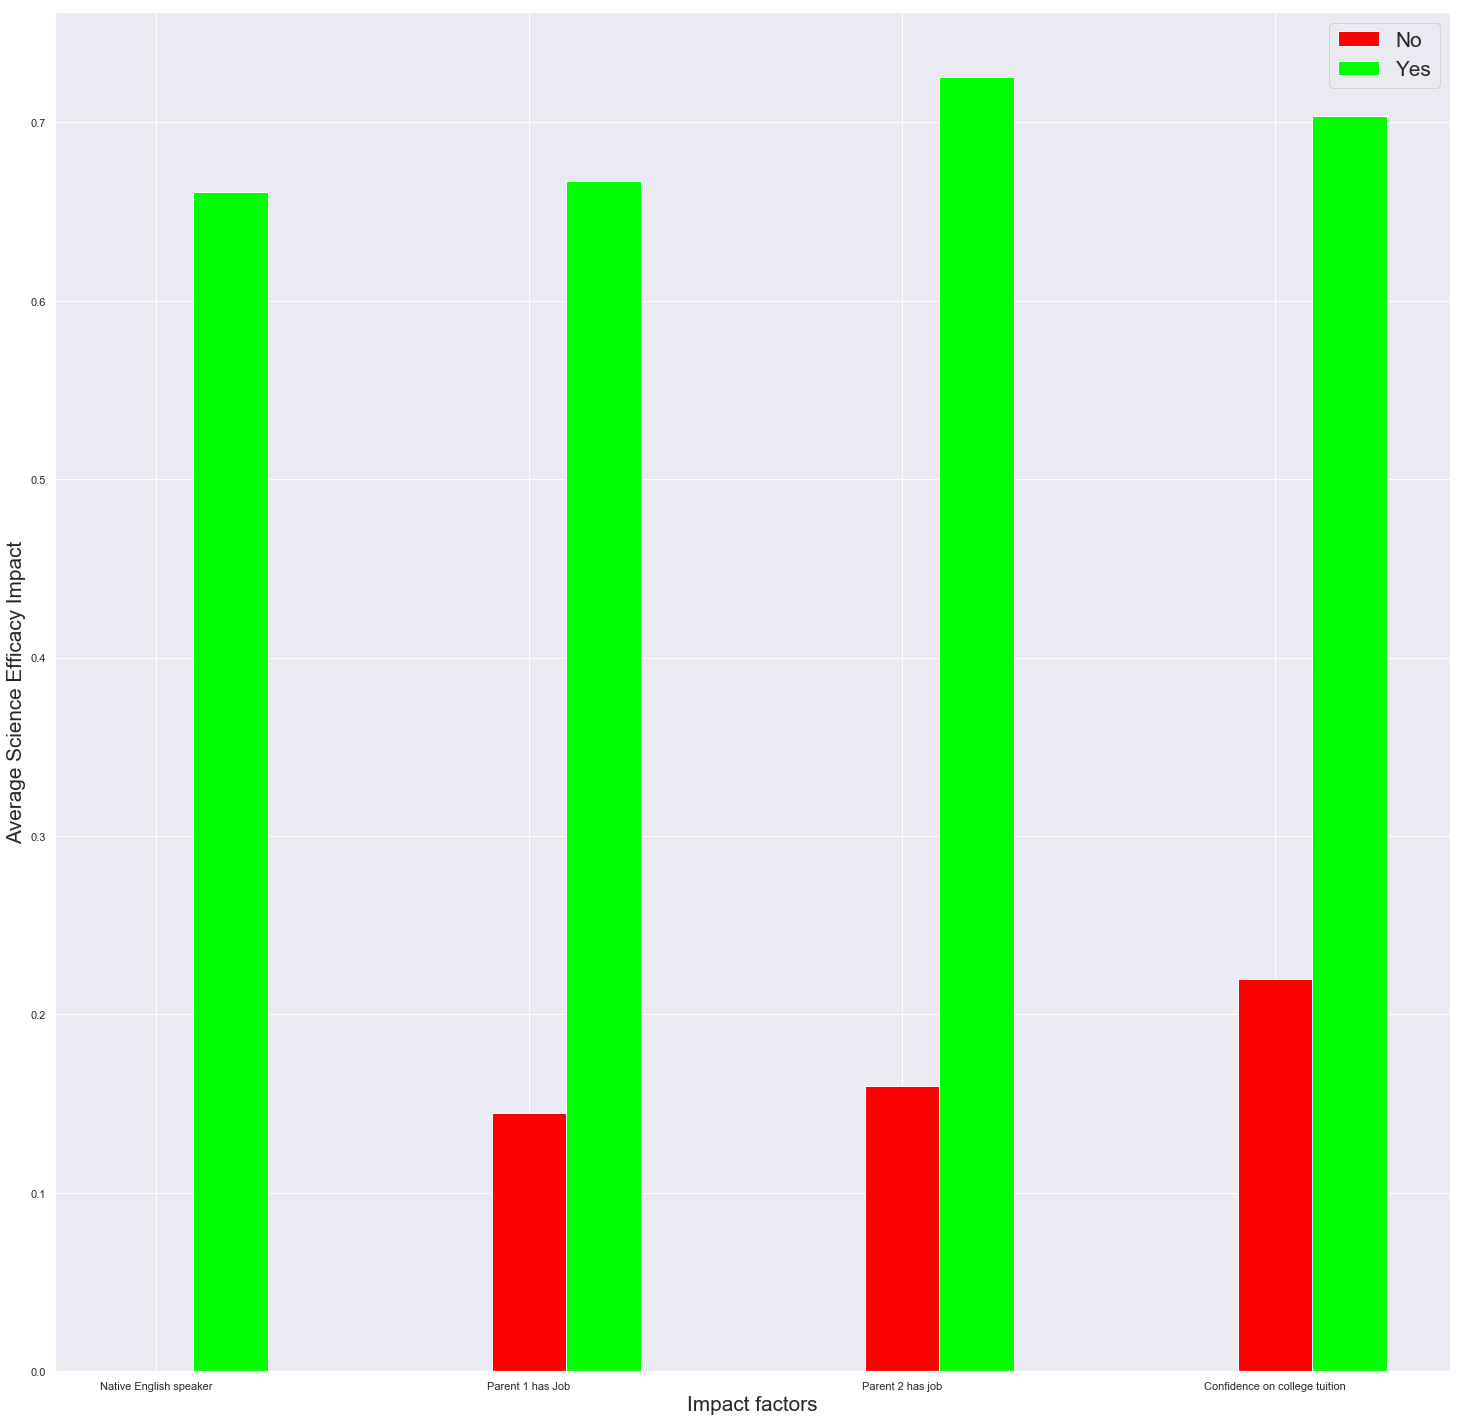

In [14]:
ParentFactor(st)

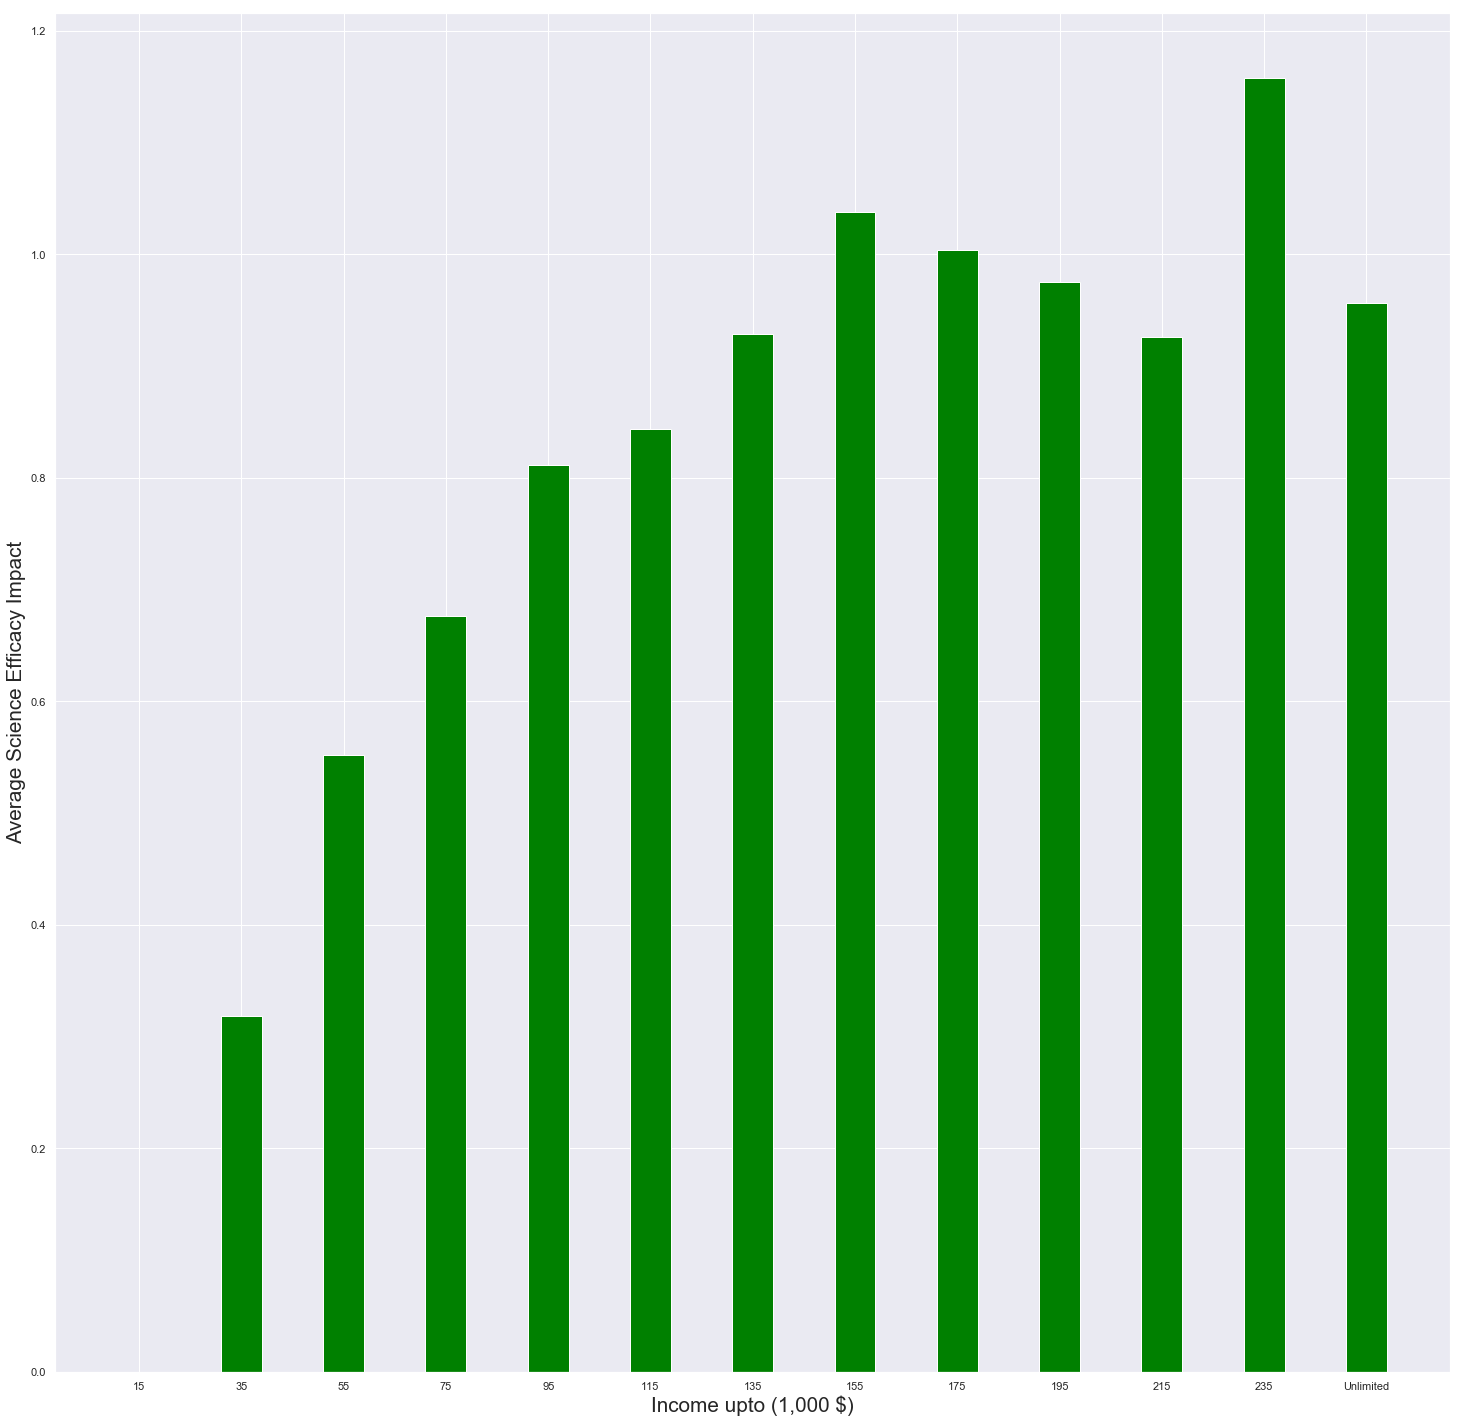

In [15]:
ParentIncome(st)